# Most Traversable Neighborhood in Pittsburgh

To find the best neighborhood in Pittsburgh we decided to find one that was easy to traverse. In order to do this we used three metrics: City of Pittsburgh traffic count,   ,and. We then each did our own analysis of each metric and then overlapped our findings to find the best neighborhood.

# City of Pittsburgh Traffic Count

In order to answer our research question we must analyze the automobile traffic and its impact on traversability of our target neighborhoods. I will do this by finding the average daily traffic, percent of vehicles over the speed limit, and the maximum recorded speed for each neighborhood.




In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
#change display options to show all rows and columns
pd.options.display.max_columns=999
pd.options.display.max_rows=999

After the data is read in, we must remove rows that are missing a value for the fields of interest.

In [2]:
#open the City of Pittsburgh Traffic data file
traffic = pd.read_csv("City of Pittsburgh Traffic Count Data.csv")
#drop rows with na for fields of interest
traffic = traffic.dropna(subset=['average_daily_car_traffic'])
traffic = traffic.dropna(subset=['neighborhood'])
#reset index after dropping rows
traffic.reset_index(drop=True, inplace=True)
traffic.head(10)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,NaN,29.0,77.0,34.0,37.0,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
2,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,NaN,19.0,2.0,21.0,23.0,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
3,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,NaN,26.0,58.0,31.0,34.0,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
4,1102260248,8,1.088318e+09,2018-07-16,2018-08-01,5592.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.911925,40.435620,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-21
5,1130122192,65,1.341476e+09,2019-02-05,2019-02-14,1455.0,NaN,NaN,StatTrak,25.0,NaN,22.0,23.0,28.0,32.0,-79.979554,40.436482,Bluff,6.0,1.0,42003010300,3.0,1.0,2.0,2-1
6,115502120,176,1.215643e+09,2019-08-09,2019-08-19,11500.0,NaN,5,StatTrak,25.0,NaN,37.0,98.0,41.0,44.0,-80.052403,40.451926,Crafton Heights,2.0,20.0,42003281400,5.0,20.0,6.0,1-16
7,1155507145,72,1.207664e+09,2019-02-14,2019-02-21,6793.0,NaN,1,StatTrak,25.0,NaN,26.0,NaN,30.0,NaN,-79.943745,40.452709,Shadyside,8.0,7.0,42003070900,2.0,7.0,4.0,3-22
8,1158858353,36,1.131387e+09,2018-06-25,2018-07-12,7688.0,NaN,NaN,StatTrak,25.0,64.0,32.0,92.0,35.0,38.0,-79.923316,40.478161,Highland Park,7.0,11.0,42003110200,2.0,11.0,5.0,3-9
9,1159852619,118,1.024536e+09,2019-07-09,2019-07-12,10350.0,NaN,12,StatTrak,25.0,NaN,29.0,78.0,34.0,39.0,-80.001937,40.447849,North Shore,1.0,22.0,42003563200,6.0,22.0,1.0,1-20


# Average Daily Traffic

In [3]:
# sort the rows by neighborhoods
traffic_sorted = traffic.sort_values('neighborhood')
traffic_sorted.head(10)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
87,462461649,78,3.743645e+08,2019-03-22,2019-03-29,2386.0,NaN,4,StatTrak,25.0,NaN,27.0,65.0,32.0,36.0,-80.009269,40.451106,Allegheny Center,1.0,22.0,42003562700,1.0,22.0,1.0,1-7
129,2137013195,221,2.090544e+09,2019-12-30,2020-01-14,477.0,NaN,2,StatTrak,25.0,NaN,20.0,11.0,24.0,28.0,-80.016819,40.452706,Allegheny West,1.0,22.0,42003562700,1.0,22.0,1.0,1-7
142,1471518402,237,4.277385e+08,2020-02-05,2020-02-13,2224.0,NaN,3,StatTrak,25.0,NaN,28.0,73.0,32.0,35.0,-79.977394,40.417815,Arlington,3.0,16.0,42003160800,3.0,16.0,3.0,4-22
143,1425434092,238,8.214502e+08,2020-02-05,2020-02-13,2347.0,NaN,1,StatTrak,25.0,NaN,25.0,50.0,30.0,34.0,-79.974196,40.417286,Arlington,3.0,16.0,42003561600,3.0,16.0,3.0,4-22
48,181106020,184,2.107179e+09,2019-09-09,2019-09-17,763.0,NaN,14,StatTrak,25.0,NaN,22.0,20.0,27.0,30.0,-80.026457,40.409511,Beechview,4.0,19.0,42003191600,5.0,19.0,6.0,4-28
140,1908186545,234,8.955754e+08,2020-02-05,2020-02-13,1446.0,NaN,Check Radar,StatTrak,25.0,NaN,28.0,72.0,32.0,35.0,-80.025019,40.418921,Beechview,4.0,19.0,42003191600,5.0,19.0,6.0,4-28
38,1670424503,45,2.562964e+08,2018-12-11,2018-12-20,2046.0,NaN,2,StatTrak,25.0,56.0,30.0,85.0,35.0,38.0,-80.025537,40.404949,Beechview,4.0,19.0,42003192000,5.0,19.0,6.0,4-28
169,756230800,275,1.042493e+09,2020-07-15,2020-07-23,1577.0,NaN,NaN,StatTrak,NaN,NaN,23.0,NaN,29.0,33.0,-80.002440,40.421750,Beltzhoover,3.0,18.0,42003562400,5.0,18.0,3.0,4-5
156,799096979,262,1.169829e+09,2020-09-04,2020-09-11,79.0,NaN,#5,StatTrak,25.0,NaN,15.0,NaN,18.0,21.0,-79.946953,40.465129,Bloomfield,7.0,8.0,42003080900,2.0,8.0,5.0,3-6
32,1592268905,111,2.423742e+08,2019-06-28,2019-07-05,6984.0,NaN,11,StatTrak,35.0,NaN,30.0,14.0,35.0,39.0,-79.950080,40.454024,Bloomfield,7.0,8.0,42003080400,2.0,8.0,5.0,2-23


In [4]:
#create the dictionary
traffic_dict = dict()
traffic_count = dict()
# iterate through the dataframe
for i in range(len(traffic)):
    # get the neighborhood name and the average daily traffic for it
    item = traffic.loc[i, 'neighborhood']
    item2 = traffic.loc[i, 'average_daily_car_traffic']
    
    if item in traffic_dict: # if it's in the dict add to running total and increment count
        traffic_dict[item] = (traffic_dict[item] + item2)
        traffic_count[item] = (traffic_count[item] + 1)
    else:
        traffic_dict[item] = item2 # otherwise, set it to the quantity and set count
        traffic_count[item] =1
        
for item in traffic_dict: #computing the average 
    traffic_dict[item] = traffic_dict[item] / traffic_count[item]

In [5]:
#convert dictionary back to series
traffic_series = pd.Series(traffic_dict, name = "Average Daily Traffic")
traffic_series.sort_values()[:]

South Side Flats               115.000000
Lincoln Place                  126.000000
Lincoln-Lemington-Belmar       195.000000
Fineview                       419.000000
Allegheny West                 477.000000
New Homestead                  666.000000
Overbrook                      777.000000
Summer Hill                    937.000000
Upper Hill                     953.333333
Central Northside             1189.000000
Spring Garden                 1226.000000
Hazelwood                     1289.500000
Spring Hill-City View         1293.000000
Elliott                       1342.666667
Beechview                     1418.333333
Windgap                       1531.000000
Highland Park                 1564.733333
Beltzhoover                   1577.000000
Lower Lawrenceville           1736.000000
Bluff                         1788.333333
East Allegheny                1924.000000
Carrick                       1969.571429
Morningside                   2049.285714
Perry North                   2123

Text(0, 0.5, 'Average Daily Traffic')

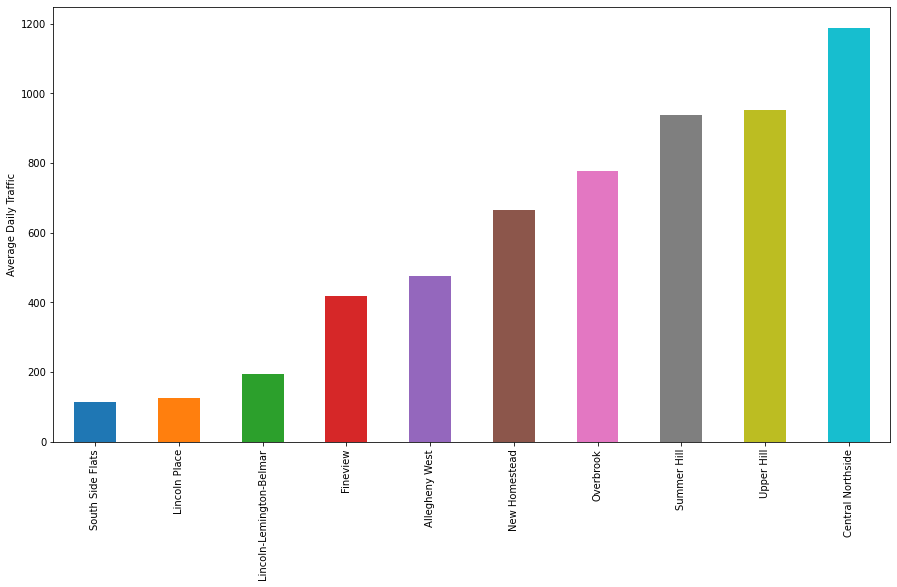

In [6]:
#graph top ten neighborhoods for lowest average daily traffic
top_ten_traffic = traffic_series.sort_values(ascending=True)[:10]
tgraph = top_ten_traffic.T.plot(kind='bar', label='index', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'],figsize=(15,top_ten_traffic.shape[0] * 0.8),legend=None)
tgraph.set_ylabel("Average Daily Traffic")

According to the graph the neighborhood with the lowest recorded amount of traffic is the South Side Flats(115 cars per day). Lincoln Place came in close in 2nd(126 cars per day).

# Speeders

Rereading in the data to avoid anomolies from data cleaning for the first analysis. 

In [20]:
speeder = pd.read_csv("City of Pittsburgh Traffic Count Data.csv")
#drop rows with na for fields of interest
speeder = speeder.dropna(subset=['percent_over_limit'])
speeder = speeder.dropna(subset=['neighborhood'])
#reset index after dropping rows
speeder.reset_index(drop=True, inplace=True)
speeder.head(10)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,NaN,29.0,77.0,34.0,37.0,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,63.0,33.0,28.0,38.0,41.0,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
2,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
3,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,NaN,19.0,2.0,21.0,23.0,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
4,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,NaN,26.0,58.0,31.0,34.0,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
5,1102260248,8,1.088318e+09,2018-07-16,2018-08-01,5592.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.911925,40.435620,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-21
6,1110382210,47,1.066699e+08,2019-05-31,2019-06-06,NaN,NaN,NaN,StatTrak,25.0,NaN,29.0,75.0,35.0,38.0,-79.927370,40.423722,Greenfield,5.0,15.0,42003151700,3.0,15.0,4.0,2-15
7,1130122192,65,1.341476e+09,2019-02-05,2019-02-14,1455.0,NaN,NaN,StatTrak,25.0,NaN,22.0,23.0,28.0,32.0,-79.979554,40.436482,Bluff,6.0,1.0,42003010300,3.0,1.0,2.0,2-1
8,115502120,176,1.215643e+09,2019-08-09,2019-08-19,11500.0,NaN,5,StatTrak,25.0,NaN,37.0,98.0,41.0,44.0,-80.052403,40.451926,Crafton Heights,2.0,20.0,42003281400,5.0,20.0,6.0,1-16
9,1158858353,36,1.131387e+09,2018-06-25,2018-07-12,7688.0,NaN,NaN,StatTrak,25.0,64.0,32.0,92.0,35.0,38.0,-79.923316,40.478161,Highland Park,7.0,11.0,42003110200,2.0,11.0,5.0,3-9


In [21]:
speeder_dict = dict()
speeder_count = dict()
# iterate through the dataframe
for i in range(len(speeder)):
    #get the neighborhood name and percent traffic over speed limit
    item = speeder.loc[i, 'neighborhood']
    item2 = speeder.loc[i, 'percent_over_limit']
    if item in speeder_dict: # if it's in the dict
        speeder_dict[item] = (speeder_dict[item] + item2)
        speeder_count[item] = (speeder_count[item] + 1)
    else:
        speeder_dict[item] = item2 # otherwise, set it to the quantity
        speeder_count[item] = 1
        
for item in speeder_dict:
    speeder_dict[item] = speeder_dict[item] / speeder_count[item]
        


In [22]:
#convert dictionary back to series
speeder_series = pd.Series(speeder_dict, name = "Percentage of vehicles that were speeding")
speeder_series.sort_values()[:]

South Side Flats              3.000000
Central Business District     6.000000
Allegheny West               11.000000
Lincoln Place                14.000000
Bluff                        14.666667
Central Lawrenceville        18.500000
Central Northside            24.166667
Upper Hill                   24.333333
Bloomfield                   24.555556
Knoxville                    25.000000
Central Oakland              25.666667
Perry South                  25.666667
Lincoln-Lemington-Belmar     26.000000
West Oakland                 28.000000
Spring Hill-City View        30.500000
Windgap                      33.666667
Marshall-Shadeland           34.750000
East Allegheny               38.000000
Highland Park                38.714286
New Homestead                39.000000
Manchester                   40.111111
Morningside                  42.125000
Lower Lawrenceville          42.500000
Shadyside                    44.066667
Polish Hill                  45.000000
Carrick                  

Text(0, 0.5, 'average percent of traffic over speed limit')

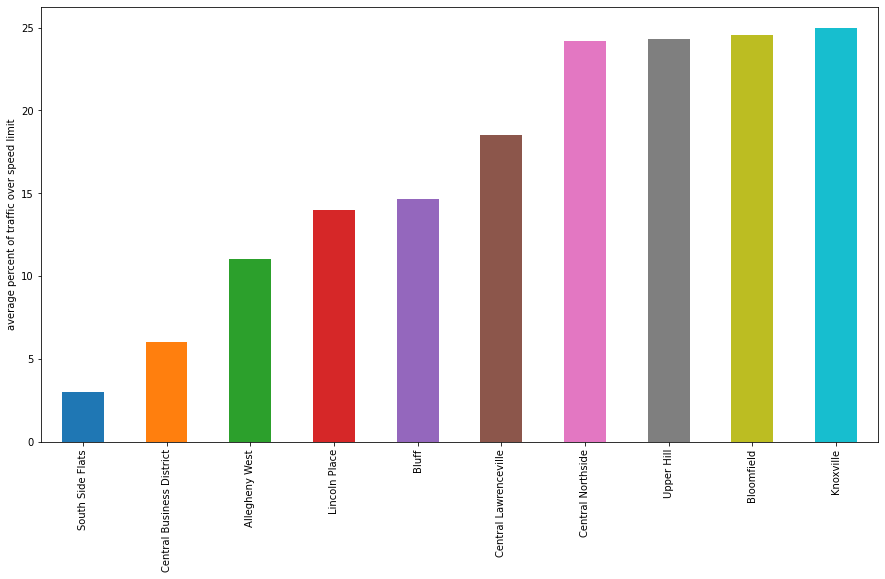

In [23]:
#graph top ten neighborhood for speed limit violations
top_ten_speeder = speeder_series.sort_values(ascending=True)[:10]
sgraph = top_ten_speeder.T.plot(kind='bar', label='index', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'],figsize=(15,top_ten_speeder.shape[0] * 0.8),legend=None)
sgraph.set_ylabel("average percent of traffic over speed limit")

South Side Flats wins again with the lowest percent of traffic over speed limit(3%), with a new runner up in second place Central Business District(6%).

# Highest Recorded Speed

In [7]:
turbo = pd.read_csv("City of Pittsburgh Traffic Count Data.csv")
#drop rows with na for fields of interest
turbo = turbo.dropna(subset=['max_speed'])
turbo = turbo.dropna(subset =['neighborhood'])
#reset index after dropping rows
turbo.reset_index(drop=True, inplace=True)
turbo.head(10)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,63.0,33.0,28.0,38.0,41.0,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
1,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
2,1102260248,8,1.088318e+09,2018-07-16,2018-08-01,5592.0,NaN,NaN,StatTrak,25.0,61.0,28.0,70.0,31.0,33.0,-79.911925,40.435620,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-21
3,1158858353,36,1.131387e+09,2018-06-25,2018-07-12,7688.0,NaN,NaN,StatTrak,25.0,64.0,32.0,92.0,35.0,38.0,-79.923316,40.478161,Highland Park,7.0,11.0,42003110200,2.0,11.0,5.0,3-9
4,1345473232,26,1.550820e+09,2018-11-14,2018-11-20,9546.0,NaN,NaN,StatTrak,25.0,59.0,28.0,68.0,31.0,34.0,-79.927790,40.436881,Squirrel Hill South,5.0,14.0,42003141300,3.0,14.0,4.0,2-21
5,137432711,61,1.367249e+09,2019-03-07,2019-03-14,8512.0,NaN,1,StatTrak,25.0,30.0,26.0,52.0,31.0,35.0,-79.914397,40.460623,Larimer,9.0,12.0,42003120800,2.0,12.0,5.0,3-10
6,1466903750,3,2.009670e+09,2018-09-13,2018-09-20,8407.0,NaN,NaN,StatTrak,25.0,77.0,32.0,97.0,36.0,39.0,-79.928992,40.469320,East Liberty,9.0,11.0,42003111300,2.0,11.0,5.0,3-4
7,1669534769,10,1.211728e+09,2018-08-20,2018-09-04,2931.0,NaN,NaN,StatTrak,25.0,73.0,32.0,44.0,36.0,40.0,-80.073396,40.457660,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
8,1670424503,45,2.562964e+08,2018-12-11,2018-12-20,2046.0,NaN,2,StatTrak,25.0,56.0,30.0,85.0,35.0,38.0,-80.025537,40.404949,Beechview,4.0,19.0,42003192000,5.0,19.0,6.0,4-28
9,1858604360,43,1.603853e+09,2018-12-04,2018-12-08,768.0,NaN,2,StatTrak,25.0,20.0,19.3,0.0,19.5,19.8,-79.961140,40.458735,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6


In [8]:
turbo_dict = dict()
turbo_count = dict()
# iterate through the dataframe
for i in range(len(turbo)):
    #get the neighborhood name and max recorded speed
    item = turbo.loc[i, 'neighborhood']
    item2 = turbo.loc[i, 'max_speed']
    if item in turbo_dict: # if it's in the dict
        turbo_dict[item] = (turbo_dict[item] + item2)
        turbo_count[item] = (turbo_count[item] + 1)
    else:
        turbo_dict[item] = item2 # otherwise, set it to the quantity
        turbo_count[item] = 1
        
for item in turbo_dict:
    turbo_dict[item] = turbo_dict[item] / turbo_count[item]

In [9]:
#convert dictionary back to series
turbo_series = pd.Series(turbo_dict, name = "Maximum speed observed")
turbo_series.sort_values()[:]

Spring Hill-City View       25.000000
Polish Hill                 43.000000
Central Oakland             43.000000
Perry South                 43.500000
Bloomfield                  44.000000
New Homestead               44.000000
Central Northside           44.500000
Elliott                     45.000000
Lincoln Place               46.000000
Perry North                 47.000000
Sheraden                    48.000000
Hazelwood                   48.000000
Central Lawrenceville       50.000000
Chartiers City              51.000000
Upper Hill                  53.000000
East Hills                  53.500000
Lincoln-Lemington-Belmar    53.500000
Larimer                     55.750000
Beechview                   56.000000
Marshall-Shadeland          57.000000
West Oakland                57.000000
Summer Hill                 57.000000
Homewood North              57.000000
Morningside                 58.000000
Manchester                  58.333333
Squirrel Hill South         59.700000
East Liberty

Text(0, 0.5, 'Maximum speed observed')

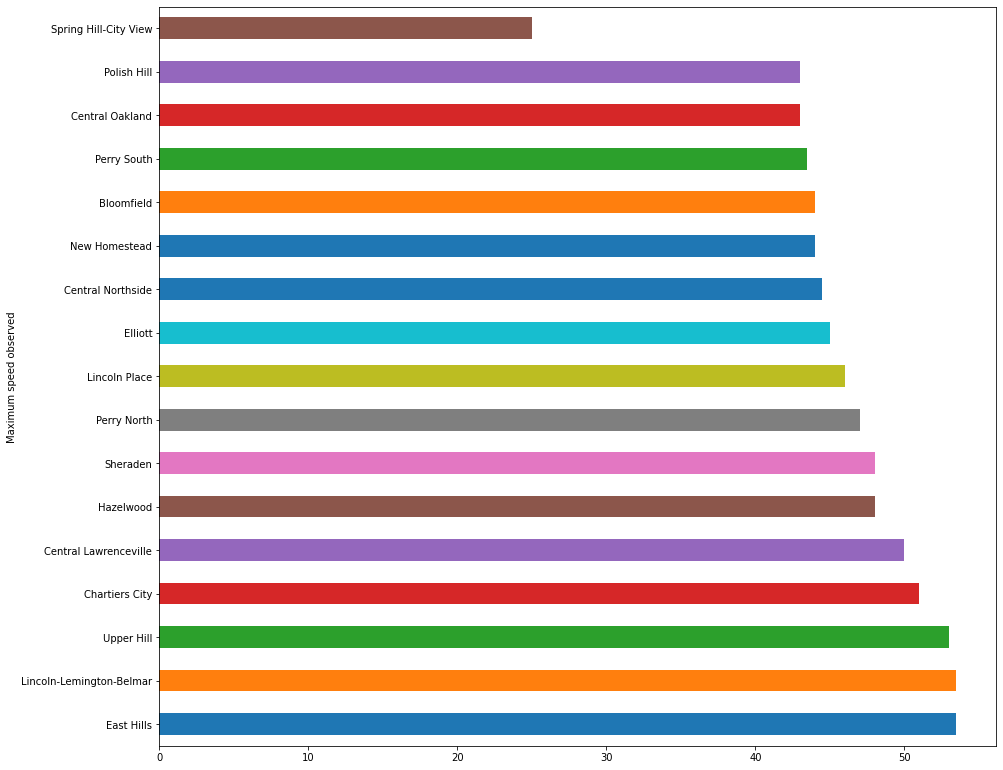

In [18]:
#graph top twenty neighborhoods by lowest maximum speed observed
top_ten_turbo = turbo_series.sort_values(ascending=False)[20:]
tbgraph = top_ten_turbo.plot.barh(label='index', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'],figsize=(15,top_ten_turbo.shape[0] * 0.8),legend=None)
tbgraph.set_ylabel("Maximum speed observed")

The graph has a new winner Spring Hill-City View for lowest maximum speed observed(25 mph).

# Conclusion from analyzing traffic metric

After analyzing the traffic data for average daily traffic, percent of speeders, and highest recorded speed, the most traversable neighborhood is South Side Flats with 1st place in two tests. Our runner up is Lincoln Place with one 2nd place and one 4th place finish.